In [3]:
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from helpers import *

In [14]:
# import sales data
sales = pd.read_csv("./csvs/all_sales.csv")
sales.sale_time = sales.sale_time.astype("datetime64[ns]")

sales = sales[["ape_id", "sale_price", "sale_time"]]
sales = sales[sales["sale_price"] > 0.01]

sales["day"] = sales["sale_time"].dt.date
# sales_by_date = sales.groupby("day").count().sale_price

sales = sales.join(
    sales.groupby("day").median().sale_price, rsuffix="_daily_avg", on="day"
)

sales["price_diff"] = sales.sale_price - sales.sale_price_daily_avg

# filter to recent sales
sales = sales[sales.sale_time > dt.datetime(2021, 9, 1)]

# get ape trait data
apes = pd.read_csv("./csvs/apes_dummy_values.csv")

# join trair data to sales
df = sales.merge(apes, on="ape_id", how="left")

df = df.drop(
    columns=[
        "ape_id",
        "sale_time",
        "day",
        "Unnamed: 0",
        "sale_price",
        "sale_price_daily_avg",
    ]
)

x = df.drop(columns="price_diff")
y = df["price_diff"]

# create train test split for x and y
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [15]:
y_pred = rf.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09416999177585861

In [18]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Random Forest Feature Importance')

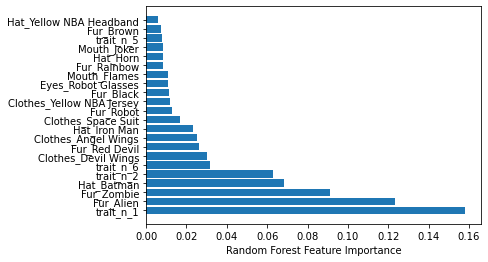

In [19]:
#look at feature importances
sorted_idx = rf.feature_importances_.argsort()[::-1]
#x.columns[sorted_idx]
plt.barh(x.columns[sorted_idx[0:22]], rf.feature_importances_[sorted_idx[0:22]])
plt.xlabel("Random Forest Feature Importance")

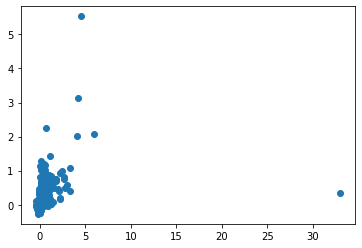

In [20]:
plt.plot(y_test, y_pred, 'o')